In [ ]:
import torch
x = torch.tensor([[1,2,3],[4,5,6],[7,8,9]])

y = torch.unsqueeze(x, 2)


y = torch.squeeze(y)

y = torch.squeeze(y)


y = y.view(3, 1, 3)
print(y)


h = torch.tensor([[[1],[2],[3]], [[4],[5],[6]]])
print(h)
print(h.ndimension())
h = torch.squeeze(h)
print(h)

tensor([[[1, 2, 3]],

        [[4, 5, 6]],

        [[7, 8, 9]]])
tensor([[[1],
         [2],
         [3]],

        [[4],
         [5],
         [6]]])
3
tensor([[1, 2, 3],
        [4, 5, 6]])


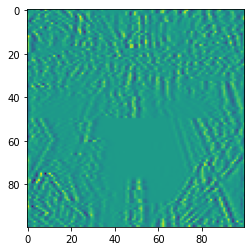

In [ ]:
import pickle
import matplotlib.pyplot as plt

broken_image = torch.FloatTensor(pickle.load(open('./broken_image_t.p' , 'rb'), encoding='latin1'))

plt.imshow(broken_image.view(100,100))

tensor([[ 3.9170,  5.5449],
        [ 3.3684,  4.5906],
        [-2.9592, -4.5039],
        [-7.1252, -9.2513],
        [-4.8943, -5.1741]])
None
tensor(9., grad_fn=<PowBackward0>)
tensor(18.)
Loss at 0 = 49424.1875
Loss at 1000 = 122765.46875
Loss at 2000 = 122779.609375
Loss at 3000 = 122789.203125
Loss at 4000 = 122783.234375
Loss at 5000 = 122793.8984375
Loss at 6000 = 122806.8203125
Loss at 7000 = 122840.5234375
Loss at 8000 = 122846.6015625
Loss at 9000 = 122892.6171875
Loss at 10000 = 122921.7265625
Loss at 11000 = 122930.5703125
Loss at 12000 = 122908.1953125
Loss at 13000 = 122920.078125
Loss at 14000 = 122925.4921875
Loss at 15000 = 122925.1875
Loss at 16000 = 122968.4609375
Loss at 17000 = 122978.8515625
Loss at 18000 = 122977.5625
Loss at 19000 = 122942.6953125


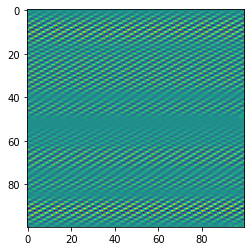

In [ ]:
w = torch.randn(5,3, dtype=torch.float)
d = torch.tensor([[1.0,2.0],[3.0,4.0],[5.0,6.0]])
wd = torch.mm(w,d)
print(wd)


w = torch.tensor(1.0, requires_grad=True)
print(w.grad)
a = w*3
l = a**2
print(l)
l.backward()
print(w.grad)

import pickle
import matplotlib.pyplot as plt

broken_image = torch.FloatTensor(pickle.load(open('./broken_image_t.p' , 'rb'), encoding='latin1'))

#plt.imshow(broken_image.view(100,100))

def weird_function(x, n_iter=5):
  h = x
  filt = torch.tensor([-1./3, 1./3, -1/.3])
  for i in range(n_iter):
    zero_tensor = torch.tensor([1.0*0])
    h_1 = torch.cat((zero_tensor, h[:-1]), 0)
    h_r = torch.cat((h[1:], zero_tensor), 0)
    h = filt[0] * h + filt[2] * h_1 + filt[1] * h_r
    if i % 2 == 0:
      h = torch.cat((h[h.shape[0]//2:], h[:h.shape[0]//2]), 0)
  return h


def distance_loss(hypothesis, broken_image):
  return torch.dist(hypothesis, broken_image)

random_tensor = torch.randn(10000, dtype =torch.float)

lr = 0.8


for i in range(0, 20000):
  random_tensor.requires_grad_(True)
  hypothesis = weird_function(random_tensor)
  loss = distance_loss(hypothesis, broken_image)
  loss.backward()

  with torch.no_grad():
    random_tensor = random_tensor - lr*random_tensor.grad
  if i % 1000 == 0:
    print('Loss at {} = {}'.format(i, loss.item()))

plt.imshow(random_tensor.view(100, 100).data)

Loss at 0 = 49371.44921875
Loss at 1000 = 124096.75
Loss at 2000 = 124101.9375
Loss at 3000 = 124110.03125
Loss at 4000 = 124134.328125
Loss at 5000 = 124152.5390625
Loss at 6000 = 124155.265625
Loss at 7000 = 124168.265625
Loss at 8000 = 124189.7578125
Loss at 9000 = 124215.7421875
Loss at 10000 = 124216.1796875
Loss at 11000 = 124220.3984375
Loss at 12000 = 124236.5859375
Loss at 13000 = 124267.6015625
Loss at 14000 = 124313.7265625
Loss at 15000 = 124348.8984375
Loss at 16000 = 124359.5390625
Loss at 17000 = 124389.890625
Loss at 18000 = 124390.3046875
Loss at 19000 = 124390.984375


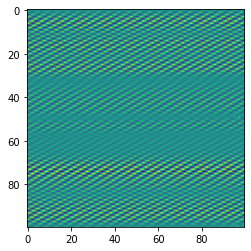

In [ ]:
import torch
import pickle
import matplotlib.pyplot as plt

broken_image = torch.FloatTensor(pickle.load(open('./broken_image_t.p' , 'rb'), encoding='latin1'))

#plt.imshow(broken_image.view(100,100))

def weird_function(x, n_iter=5):
  h = x
  filt = torch.tensor([-1./3, 1./3, -1/.3])
  for i in range(n_iter):
    zero_tensor = torch.tensor([1.0*0])
    h_1 = torch.cat((zero_tensor, h[:-1]), 0)
    h_r = torch.cat((h[1:], zero_tensor), 0)
    h = filt[0] * h + filt[2] * h_1 + filt[1] * h_r
    if i % 2 == 0:
      h = torch.cat((h[h.shape[0]//2:], h[:h.shape[0]//2]), 0)
  return h


def distance_loss(hypothesis, broken_image):
  return torch.dist(hypothesis, broken_image)

random_tensor = torch.randn(10000, dtype =torch.float)

lr = 0.8


for i in range(0, 20000):
  random_tensor.requires_grad_(True)
  hypothesis = weird_function(random_tensor)
  loss = distance_loss(hypothesis, broken_image)
  loss.backward()

  with torch.no_grad():
    random_tensor = random_tensor - lr*random_tensor.grad
  if i % 1000 == 0:
    print('Loss at {} = {}'.format(i, loss.item()))

plt.imshow(random_tensor.view(100, 100).data)

tensor([ 0.6997,  0.6189,  0.7378,  ..., -0.2099,  0.6727,  0.0058])
Loss at 0 = 12.144959449768066
Loss at 1000 = 1.1674550771713257
Loss at 2000 = 0.5667962431907654
Loss at 3000 = 0.3880705237388611
Loss at 4000 = 0.30380645394325256
Loss at 5000 = 0.25269782543182373
Loss at 6000 = 0.2164212465286255
Loss at 7000 = 0.1878974586725235
Loss at 8000 = 0.16394217312335968
Loss at 9000 = 0.1429131031036377
Loss at 10000 = 0.12386121600866318
Loss at 11000 = 0.10619159787893295
Loss at 12000 = 0.08951719850301743
Loss at 13000 = 0.07357840240001678
Loss at 14000 = 0.05819821357727051
Loss at 15000 = 0.043254561722278595
Loss at 16000 = 0.02866375260055065
Loss at 17000 = 0.021155111491680145
Loss at 18000 = 0.021166028454899788
Loss at 19000 = 0.021167755126953125


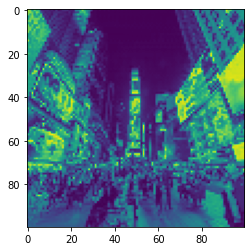

In [75]:
import torch
import pickle
import matplotlib.pyplot as plt

broken_image = torch.FloatTensor(pickle.load(open('./broken_image_t.p' , 'rb')))

#plt.imshow(broken_image.view(100,100))

def weird_function(x, n_iter=5):
  h = x
  filt = torch.tensor([-1./3, 1./3, -1./3])
  for i in range(n_iter):
    zero_tensor = torch.tensor([1.0*0])
    h_1 = torch.cat((zero_tensor, h[:-1]), 0)
    h_r = torch.cat((h[1:], zero_tensor), 0)
    h = filt[0] * h + filt[2] * h_1 + filt[1] * h_r
    if i % 2 == 0:
      h = torch.cat((h[h.shape[0]//2:], h[:h.shape[0]//2]), 0)
  return h

def distance_loss(hypothesis, broken_image):
  return torch.dist(hypothesis, broken_image)

random_tensor = torch.randn(10000, dtype=torch.float)
print(random_tensor)

lr = 0.8

for i in range(0, 20000):
  random_tensor.requires_grad_(True)
  hypothesis = weird_function(random_tensor)
  loss = distance_loss(hypothesis, broken_image)
  loss.backward()

  with torch.no_grad():
    random_tensor = random_tensor - lr*random_tensor.grad
  if i % 1000 == 0:
    print('Loss at {} = {}'.format(i, loss.item()))

plt.imshow(random_tensor.view(100, 100).data)

# 새 섹션